# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | This time British Airways ...
1,"✅ Trip Verified | The seats were excellent, ..."
2,✅ Trip Verified | After the nightmare of get...
3,✅ Trip Verified | Prior to boarding a gate a...
4,✅ Trip Verified | I flew from Amsterdam to L...


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
# Remove everything before and including '|'
df["reviews"] = df["reviews"].str.split('|', 1).str[-1].str.strip()

# Save the cleaned data back to CSV
df.to_csv("data/BA_reviews_cleaned.csv", index=False)

In [6]:
df.head

<bound method NDFrame.head of                                                reviews
0    This time British Airways managed to get every...
1    The seats were excellent, with a feel of much ...
2    After the nightmare of getting through triple ...
3    Prior to boarding a gate agent seemed to pick ...
4    I flew from Amsterdam to Las Vegas with a layo...
..                                                 ...
995  London to St Petersburgh. Huge disappointment ...
996  Sydney to London via Singapore with British Ai...
997  London to Johannesburg. British Airways is one...
998  I have to say travelling in Club Europe is a w...
999  I had a stress free journey with my 8 yr old a...

[1000 rows x 1 columns]>

In [7]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,This time British Airways managed to get every...,This time British Airways managed to get every...
1,"The seats were excellent, with a feel of much ...",The seats were excellent with a feel of much m...
2,After the nightmare of getting through triple ...,After the nightmare of getting through triple ...
3,Prior to boarding a gate agent seemed to pick ...,Prior to boarding a gate agent seemed to pick ...
4,I flew from Amsterdam to Las Vegas with a layo...,I flew from Amsterdam to Las Vegas with a layo...


In [8]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...


In [9]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,This time British Airways managed to get every...,This time British Airways managed to get every...,"[(time, n), (British, a), (Airways, n), (manag..."
1,"The seats were excellent, with a feel of much ...",The seats were excellent with a feel of much m...,"[(seats, n), (excellent, a), (feel, n), (much,..."
2,After the nightmare of getting through triple ...,After the nightmare of getting through triple ...,"[(nightmare, n), (getting, v), (triple, a), (s..."
3,Prior to boarding a gate agent seemed to pick ...,Prior to boarding a gate agent seemed to pick ...,"[(Prior, r), (boarding, v), (gate, n), (agent,..."
4,I flew from Amsterdam to Las Vegas with a layo...,I flew from Amsterdam to Las Vegas with a layo...,"[(flew, v), (Amsterdam, n), (Las, n), (Vegas, ..."


In [10]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,This time British Airways managed to get every...,This time British Airways managed to get every...,"[(time, n), (British, a), (Airways, n), (manag...",time British Airways manage get everything r...
1,"The seats were excellent, with a feel of much ...",The seats were excellent with a feel of much m...,"[(seats, n), (excellent, a), (feel, n), (much,...",seat excellent feel much room official seat ...
2,After the nightmare of getting through triple ...,After the nightmare of getting through triple ...,"[(nightmare, n), (getting, v), (triple, a), (s...",nightmare get triple security Nairobi Airpor...
3,Prior to boarding a gate agent seemed to pick ...,Prior to boarding a gate agent seemed to pick ...,"[(Prior, r), (boarding, v), (gate, n), (agent,...",Prior board gate agent seem pick elderly peo...
4,I flew from Amsterdam to Las Vegas with a layo...,I flew from Amsterdam to Las Vegas with a layo...,"[(flew, v), (Amsterdam, n), (Las, n), (Vegas, ...",fly Amsterdam Las Vegas layover Heathrow Nov...


In [11]:
df[['reviews','Lemma']]

,reviews,Lemma
0,This time British Airways managed to get every...,time British Airways manage get everything r...
1,"The seats were excellent, with a feel of much ...",seat excellent feel much room official seat ...
2,After the nightmare of getting through triple ...,nightmare get triple security Nairobi Airpor...
3,Prior to boarding a gate agent seemed to pick ...,Prior board gate agent seem pick elderly peo...
4,I flew from Amsterdam to Las Vegas with a layo...,fly Amsterdam Las Vegas layover Heathrow Nov...
...,...,...
995,London to St Petersburgh. Huge disappointment ...,London St Petersburgh Huge disappointment BA...
996,Sydney to London via Singapore with British Ai...,Sydney London via Singapore British Airways ...
997,London to Johannesburg. British Airways is one...,London Johannesburg British Airways one comm...
998,I have to say travelling in Club Europe is a w...,say travel Club Europe waste money food good...


In [13]:
!pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 126.0/126.0 kB 389.6 kB/s eta 0:00:00


In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,This time British Airways managed to get every...,This time British Airways managed to get every...,"[(time, n), (British, a), (Airways, n), (manag...",time British Airways manage get everything r...,0.9831,Positive
1,"The seats were excellent, with a feel of much ...",The seats were excellent with a feel of much m...,"[(seats, n), (excellent, a), (feel, n), (much,...",seat excellent feel much room official seat ...,0.5719,Positive
2,After the nightmare of getting through triple ...,After the nightmare of getting through triple ...,"[(nightmare, n), (getting, v), (triple, a), (s...",nightmare get triple security Nairobi Airpor...,0.9674,Positive
3,Prior to boarding a gate agent seemed to pick ...,Prior to boarding a gate agent seemed to pick ...,"[(Prior, r), (boarding, v), (gate, n), (agent,...",Prior board gate agent seem pick elderly peo...,-0.6486,Negative
4,I flew from Amsterdam to Las Vegas with a layo...,I flew from Amsterdam to Las Vegas with a layo...,"[(flew, v), (Amsterdam, n), (Las, n), (Vegas, ...",fly Amsterdam Las Vegas layover Heathrow Nov...,-0.8458,Negative


In [15]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    460
Negative    426
Neutral     114
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x1d173c26490>,
 [Text(0.13786652831108215, 1.0913261750601648, 'Positive'),
  Text(-0.511666137747723, -0.9737544677598806, 'Negative'),
  Text(1.2643423691745355, -0.47322127330681485, 'Neutral')],
 [Text(0.07519992453331752, 0.5952688227600899, '46.0%'),
  Text(-0.27909062058966705, -0.5311388005962985, '42.6%'),
  Text(0.7960674176284112, -0.29795413504503154, '11.4%')])

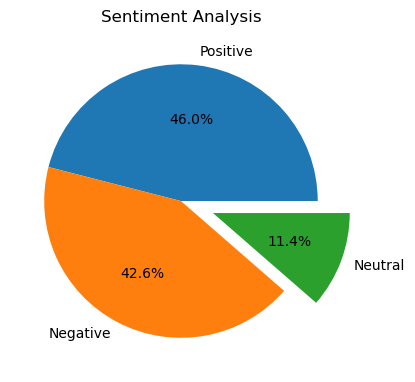

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Sentiment Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

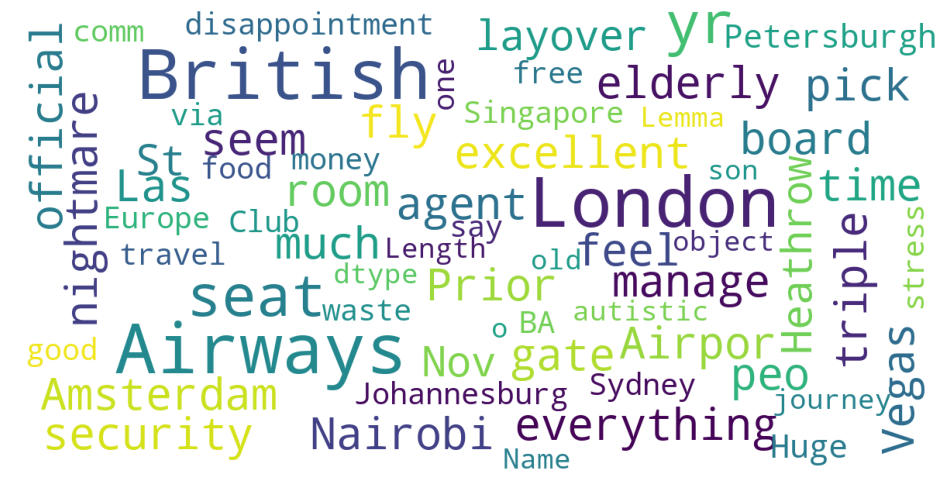

In [18]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

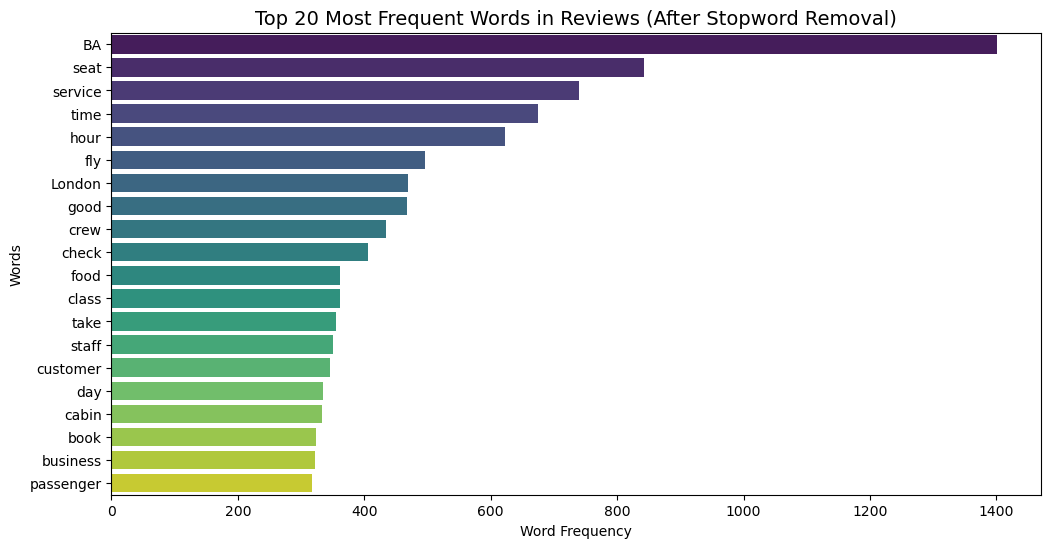

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Define words to remove (domain-specific stopwords)
custom_stopwords = {"british", "flight", "airline", "airways", "us", "one", "would", "BA", "get", "make", "go","tell"}

# Tokenize words from the 'Lemma' column and remove custom stopwords
all_words = [word for word in " ".join(df['Lemma']).split() if word.lower() not in custom_stopwords]

# Count the most common words
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)  # Get top 20 words

# Convert to DataFrame for plotting
word_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Word', data=word_df, palette="viridis")
plt.title("Top 20 Most Frequent Words in Reviews (After Stopword Removal)", fontsize=14)
plt.xlabel("Word Frequency")
plt.ylabel("Words")
plt.show()